Tester le problème FloatSum

In [4]:
# Cellule 1: Installation et import des bibliothèques nécessaires
!pip install jmetalpy

import random
import numpy as np
import time
from jmetal.core.problem import Problem
from jmetal.core.solution import FloatSolution
from jmetal.algorithm.singleobjective.local_search import LocalSearch
from jmetal.operator import PolynomialMutation
from jmetal.util.termination_criterion import StoppingByEvaluations
import matplotlib.pyplot as plt

Looking in indexes: https://nexus.fil.univ-lille.fr/repository/pypi-proxy/simple


In [5]:
# Cellule 2: Implémentation du problème FloatSumMax (fourni dans le TP)
class FloatSumMax(Problem):
    def __init__(self, number_of_floats: int, min_value: float, max_value: float):
        super().__init__()
        self.number_of_floats = number_of_floats
        self.min_value = min_value
        self.max_value = max_value
        
        self.lower_bound = [self.min_value] * number_of_floats
        self.upper_bound = [self.max_value] * number_of_floats
        
        self.number_of_objectives = 1
        self.obj_directions = [self.MINIMIZE]
        self.obj_labels = ['SumMax']
        
    def number_of_variables(self) -> int:
        return self.number_of_floats
    
    def number_of_objectives(self) -> int:
        return self.number_of_objectives
    
    def number_of_constraints(self) -> int:
        return 0
    
    def evaluate(self, solution):
        solution.objectives[0] = -sum(solution.variables)  # Négatif car on maximise
        return solution
    
    def create_solution(self):
        new_solution = FloatSolution(
            self.lower_bound,
            self.upper_bound,
            self.number_of_objectives,
            self.number_of_constraints()
        )
        
        new_solution.variables = [
            random.uniform(self.lower_bound[i] * 1.0, self.upper_bound[i] * 1.0)
            for i in range(self.number_of_variables())
        ]
        
        return new_solution
    
    def name(self):
        return 'FloatSumMax'

In [6]:
# Cellule 3: Test du problème FloatSumMax avec des solutions manuelles
print("=== Test du problème FloatSumMax ===")

# Configuration du problème
n = 7
bi = -273.15
bs = 5500.00

problem = FloatSumMax(number_of_floats=n, min_value=bi, max_value=bs)

# Création et évaluation d'une solution manuelle
solution1 = problem.create_solution()
solution1.variables = [10.5, -26.3, 29.35, 12.22, -13.51, 2.24, 52.07]
solution1 = problem.evaluate(solution1)
print(f"Solution 1: {solution1.variables}")
print(f"Score (objectif): {solution1.objectives[0]:.2f}")
print(f"Somme réelle (à maximiser): {-solution1.objectives[0]:.2f}")

solution2 = problem.create_solution()
solution2.variables = [5476.33, -227.06, 2896.86, 5212.22, 3913.51, 4302.24, 3352.07]
solution2 = problem.evaluate(solution2)
print(f"\nSolution 2: {solution2.variables}")
print(f"Score (objectif): {solution2.objectives[0]:.2f}")
print(f"Somme réelle (à maximiser): {-solution2.objectives[0]:.2f}")

solution_opt = problem.create_solution()
solution_opt.variables = [5500.00, 5500.00, 5500.00, 5500.00, 5500.00, 5500.00, 5500.00]
solution_opt = problem.evaluate(solution_opt)
print(f"\nSolution optimale théorique: {solution_opt.variables}")
print(f"Score (objectif): {solution_opt.objectives[0]:.2f}")
print(f"Somme réelle (à maximiser): {-solution_opt.objectives[0]:.2f}")

=== Test du problème FloatSumMax ===
Solution 1: [10.5, -26.3, 29.35, 12.22, -13.51, 2.24, 52.07]
Score (objectif): -66.57
Somme réelle (à maximiser): 66.57

Solution 2: [5476.33, -227.06, 2896.86, 5212.22, 3913.51, 4302.24, 3352.07]
Score (objectif): -24926.17
Somme réelle (à maximiser): 24926.17

Solution optimale théorique: [5500.0, 5500.0, 5500.0, 5500.0, 5500.0, 5500.0, 5500.0]
Score (objectif): -38500.00
Somme réelle (à maximiser): 38500.00


In [9]:
# Cellule 4 (corrigée): Implémentation de la recherche locale pour FloatSumMax
def run_local_search_floatsum(problem, max_evaluations=10000, mutation_probability=0.1, 
                             mutation_perturbation=0.5, runs=20):
    """
    Exécute la recherche locale pour le problème FloatSumMax
    """
    results = []
    execution_times = []
    best_solutions = []
    
    print(f"=== Recherche Locale pour FloatSumMax ===")
    print(f"Configuration: {problem.number_of_variables()} variables, "
          f"intervalle [{problem.min_value}, {problem.max_value}]")
    print(f"Paramètres: max_evaluations={max_evaluations}, mutation_probability={mutation_probability}")
    
    for run in range(runs):
        start_time = time.time()
        
        # Configuration de la mutation polynomiale
        mutation = PolynomialMutation(
            probability=mutation_probability,
            distribution_index=mutation_perturbation
        )
        
        # Configuration de l'algorithme de recherche locale
        algorithm = LocalSearch(
            problem=problem,
            mutation=mutation,
            termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations)
        )
        
        # Exécution de l'algorithme
        algorithm.run()
        result = algorithm.get_result()  # CORRECTION: get_result() avec un seul 's'
        
        end_time = time.time()
        execution_time = end_time - start_time
        
        # Stockage des résultats
        results.append(-result.objectives[0])  # On prend l'opposé pour avoir la somme
        execution_times.append(execution_time)
        best_solutions.append(result)
        
        print(f"Run {run+1}: Somme = {-result.objectives[0]:.2f}, "
              f"Temps = {execution_time:.4f}s")
    
    return results, execution_times, best_solutions

In [11]:
# Cellule 5 bis: Version robuste de la recherche locale
def run_local_search_floatsum_robuste(problem, max_evaluations=10000, mutation_probability=0.1, 
                                      mutation_perturbation=0.5, runs=20):
    """
    Version robuste avec gestion des différentes versions de JMetalPy
    """
    results = []
    execution_times = []
    best_solutions = []
    
    print(f"=== Recherche Locale pour FloatSumMax ===")
    print(f"Configuration: {problem.number_of_variables()} variables, "
          f"intervalle [{problem.min_value}, {problem.max_value}]")
    print(f"Paramètres: max_evaluations={max_evaluations}, mutation_probability={mutation_probability}")
    
    for run in range(runs):
        start_time = time.time()
        
        # Configuration de la mutation polynomiale
        mutation = PolynomialMutation(
            probability=mutation_probability,
            distribution_index=mutation_perturbation
        )
        
        # Configuration de l'algorithme de recherche locale
        algorithm = LocalSearch(
            problem=problem,
            mutation=mutation,
            termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations)
        )
        
        # Exécution de l'algorithme
        algorithm.run()
        
        # Récupération du résultat selon la version de JMetalPy
        result = None
        if hasattr(algorithm, 'get_result') and callable(algorithm.get_result):
            result = algorithm.get_result()
        elif hasattr(algorithm, 'result'):
            result = algorithm.result
            if callable(result):
                result = result()
        elif hasattr(algorithm, 'get_best_solution') and callable(algorithm.get_best_solution):
            result = algorithm.get_best_solution()
        else:
            # Essai d'accès direct aux attributs
            try:
                result = algorithm.get_result
                if callable(result):
                    result = result()
            except:
                print("Impossible de récupérer le résultat")
                continue
        
        end_time = time.time()
        execution_time = end_time - start_time
        
        if result is not None:
            # Stockage des résultats
            results.append(-result.objectives[0])  # On prend l'opposé pour avoir la somme
            execution_times.append(execution_time)
            best_solutions.append(result)
            
            print(f"Run {run+1}: Somme = {-result.objectives[0]:.2f}, "
                  f"Temps = {execution_time:.4f}s")
        else:
            print(f"Run {run+1}: Échec de récupération du résultat")
    
    return results, execution_times, best_solutions

# Exécution de la version robuste
results, exec_times, best_sols = run_local_search_floatsum_robuste(
    problem=problem,
    max_evaluations=5000,
    mutation_probability=0.1,
    mutation_perturbation=20,
    runs=20
)

[2026-01-27 13:21:18,595] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:18,597] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:18,598] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:18,598] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:18,708] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:18,708] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:18,709] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:18,709] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:18,709] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


=== Recherche Locale pour FloatSumMax ===
Configuration: 7 variables, intervalle [-273.15, 5500.0]
Paramètres: max_evaluations=5000, mutation_probability=0.1
Run 1: Somme = 38500.00, Temps = 0.1131s


[2026-01-27 13:21:18,807] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:18,808] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:18,808] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:18,808] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:18,809] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:18,908] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:18,909] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:18,909] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:18,909] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:18,909] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,009] [jmetal.core.algorithm] [DEBUG] Finished!


Run 2: Somme = 38500.00, Temps = 0.0992s
Run 3: Somme = 38500.00, Temps = 0.1009s


[2026-01-27 13:21:19,010] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,010] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,010] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,010] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,111] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:19,112] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,112] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,112] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,113] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,210] [jmetal.core.algorithm] [DEBUG] Finished!


Run 4: Somme = 38500.00, Temps = 0.1010s
Run 5: Somme = 38500.00, Temps = 0.1020s


[2026-01-27 13:21:19,211] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,211] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,212] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,212] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,311] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:19,312] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,312] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,313] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,313] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,411] [jmetal.core.algorithm] [DEBUG] Finished!


Run 6: Somme = 38500.00, Temps = 0.0993s
Run 7: Somme = 38500.00, Temps = 0.1011s


[2026-01-27 13:21:19,412] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,412] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,413] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,413] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,513] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:19,514] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,514] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,514] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,515] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,612] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:19,612] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...


Run 8: Somme = 38500.00, Temps = 0.1000s
Run 9: Somme = 38500.00, Temps = 0.1016s
Run 10: Somme = 38500.00, Temps = 0.0986s


[2026-01-27 13:21:19,613] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,613] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,613] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,714] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:19,715] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,715] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,716] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,716] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:19,818] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:19,818] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,818] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,819] [jmetal.core.alg

Run 11: Somme = 38500.00, Temps = 0.1024s
Run 12: Somme = 38500.00, Temps = 0.1034s


[2026-01-27 13:21:19,919] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:19,919] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:19,920] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:19,920] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:20,019] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:20,020] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:20,020] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:20,021] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:20,021] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:20,121] [jmetal.core.algorithm] [DEBUG] Finished!


Run 13: Somme = 38500.00, Temps = 0.1008s
Run 14: Somme = 38500.00, Temps = 0.1008s


[2026-01-27 13:21:20,122] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:20,122] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:20,122] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:20,123] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:20,226] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:20,226] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:20,227] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:20,227] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:20,227] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:20,326] [jmetal.core.algorithm] [DEBUG] Finished!


Run 15: Somme = 38500.00, Temps = 0.1018s
Run 16: Somme = 38500.00, Temps = 0.1047s


[2026-01-27 13:21:20,326] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:20,327] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:20,327] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:20,327] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:20,427] [jmetal.core.algorithm] [DEBUG] Finished!
[2026-01-27 13:21:20,427] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:20,428] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:20,428] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:20,429] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:20,531] [jmetal.core.algorithm] [DEBUG] Finished!


Run 17: Somme = 38500.00, Temps = 0.1001s
Run 18: Somme = 38500.00, Temps = 0.1010s


[2026-01-27 13:21:20,531] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2026-01-27 13:21:20,532] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2026-01-27 13:21:20,532] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2026-01-27 13:21:20,532] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2026-01-27 13:21:20,634] [jmetal.core.algorithm] [DEBUG] Finished!


Run 19: Somme = 38500.00, Temps = 0.1039s
Run 20: Somme = 38500.00, Temps = 0.1030s


In [12]:
# Cellule 6: Analyse statistique des résultats
print("\n=== Analyse statistique des résultats ===")

# Calcul des statistiques
mean_result = np.mean(results)
median_result = np.median(results)
std_result = np.std(results)
min_result = np.min(results)
max_result = np.max(results)

mean_time = np.mean(exec_times)
median_time = np.median(exec_times)
std_time = np.std(exec_times)

print(f"Résultats (sommes maximalisées):")
print(f"  Moyenne: {mean_result:.2f}")
print(f"  Médiane: {median_result:.2f}")
print(f"  Écart-type: {std_result:.2f}")
print(f"  Minimum: {min_result:.2f}")
print(f"  Maximum: {max_result:.2f}")
print(f"  Somme optimale théorique: {n * bs:.2f}")

print(f"\nTemps d'exécution:")
print(f"  Moyenne: {mean_time:.4f} s")
print(f"  Médiane: {median_time:.4f} s")
print(f"  Écart-type: {std_time:.4f} s")

# Meilleure solution trouvée
best_run = np.argmax(results)
best_solution = best_sols[best_run]
print(f"\nMeilleure solution (run {best_run + 1}):")
print(f"  Variables: {[f'{v:.2f}' for v in best_solution.variables]}")
print(f"  Somme: {-best_solution.objectives[0]:.2f}")


=== Analyse statistique des résultats ===
Résultats (sommes maximalisées):
  Moyenne: 38500.00
  Médiane: 38500.00
  Écart-type: 0.00
  Minimum: 38500.00
  Maximum: 38500.00
  Somme optimale théorique: 38500.00

Temps d'exécution:
  Moyenne: 0.1019 s
  Médiane: 0.1010 s
  Écart-type: 0.0030 s

Meilleure solution (run 1):
  Variables: ['5500.00', '5500.00', '5500.00', '5500.00', '5500.00', '5500.00', '5500.00']
  Somme: 38500.00


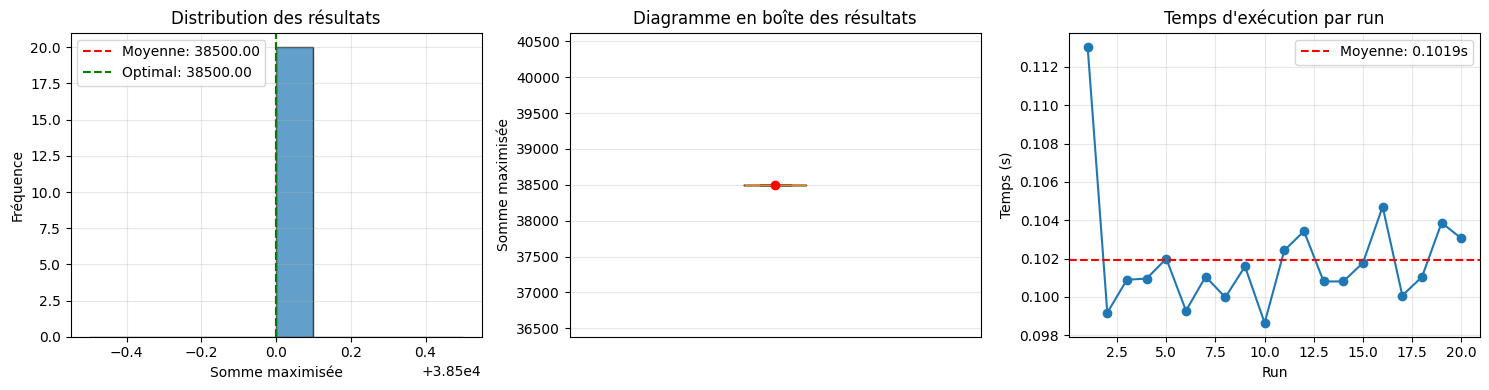

In [13]:
# Cellule 7: Visualisation des résultats
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogramme des résultats
axes[0].hist(results, bins=10, edgecolor='black', alpha=0.7)
axes[0].axvline(mean_result, color='r', linestyle='--', label=f'Moyenne: {mean_result:.2f}')
axes[0].axvline(n * bs, color='g', linestyle='--', label=f'Optimal: {n * bs:.2f}')
axes[0].set_xlabel('Somme maximisée')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution des résultats')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Diagramme en boîte
axes[1].boxplot(results)
axes[1].scatter([1], [mean_result], color='r', label='Moyenne', zorder=3)
axes[1].set_ylabel('Somme maximisée')
axes[1].set_title('Diagramme en boîte des résultats')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([])

# Temps d'exécution
axes[2].plot(range(1, len(exec_times) + 1), exec_times, marker='o', linestyle='-')
axes[2].axhline(mean_time, color='r', linestyle='--', label=f'Moyenne: {mean_time:.4f}s')
axes[2].set_xlabel('Run')
axes[2].set_ylabel('Temps (s)')
axes[2].set_title('Temps d\'exécution par run')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()